### 1. Introduction to Trading Data Visualization 📊

Before we begin training a model for predicting commodity prices, we find it valuable to present data in a way that resembles how traders view it on trading platforms. 🚀

The data we will analyze consists of crucial components that traders rely on when making informed decisions:

- **Open, Close, High, and Low Prices**: These key price points for an asset are represented in a chart known as a **candlestick chart**. 🔥 Each candle provides a visual representation of price movements over a specific period, allowing traders to quickly assess market trends and mood.

    [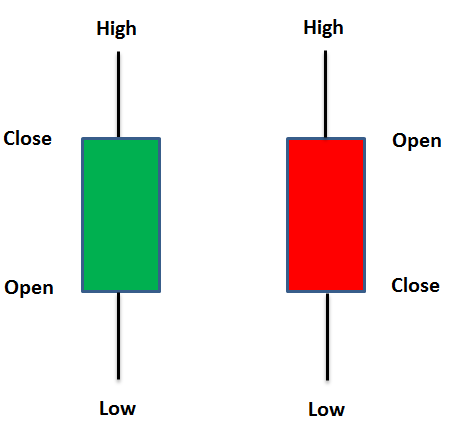]

- **Volume of Contracts Traded**: The trading volume, which indicates the number of contracts exchanged during a specific time frame, can be visualized in a separate bar chart below the candlestick chart. 📈 This information helps traders understand the strength behind price movements—higher volumes often suggest greater trader interest. 

To analyze how the asset has performed over time, we apply **moving averages**. 📉 These averages smooth out price data and provide insight into the direction of the trend. Traders often use them to identify potential support and resistance levels, as well as entry and exit points. ⚖️

The visualizations we created illustrate the historical performance of the selected commodity, offering a comprehensive view of price action along with trading volume, thus mimicking the context in which traders operate. 🛠️

Understanding these essential elements of technical analysis forms the foundation of our approach, allowing us to draw insights from historical data and make predictions about future price movements effectively. 🌟


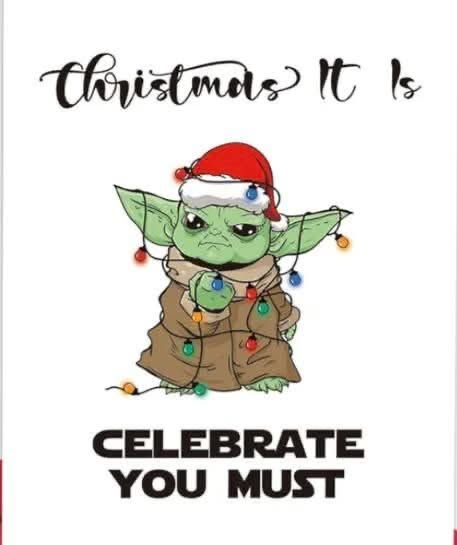

In [1]:
# Imports
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:

# Step 1: Load the data
data = pd.read_csv('/kaggle/input/mitsui-commodity-prediction-challenge/train.csv')

# Step 2: Define the specific asset
asset = 'JPX_Gold_Rolling-Spot_Futures'

# Step 3: Prepare the data for candlestick chart
df_asset = data[['date_id', 
                 f'{asset}_Open', 
                 f'{asset}_High', 
                 f'{asset}_Low', 
                 f'{asset}_Close', 
                 f'{asset}_Volume']].copy()

# Convert date_id to datetime
df_asset['date'] = pd.to_datetime(df_asset['date_id'], unit='D', origin='2018-10-01')

# Step 4: Fill NaN values in the closing prices (forward fill)
df_asset[f'{asset}_Close'] = df_asset[f'{asset}_Close'].ffill()

# Step 5: Calculate moving averages using the filled closing prices
df_asset['MA9'] = df_asset[f'{asset}_Close'].rolling(window=9).mean()
df_asset['MA21'] = df_asset[f'{asset}_Close'].rolling(window=21).mean()

# Step 6: Create subplots: one for candlestick and one for volume
fig = make_subplots(rows=2, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.1, 
                    subplot_titles=(f'{asset} Candlestick Chart', ''))

# Add the candlestick chart
fig.add_trace(go.Candlestick(x=df_asset['date'],
                              open=df_asset[f'{asset}_Open'],
                              high=df_asset[f'{asset}_High'],
                              low=df_asset[f'{asset}_Low'],
                              close=df_asset[f'{asset}_Close'],
                              name='Candlestick'),
              row=1, col=1)

# Add moving averages
fig.add_trace(go.Scatter(x=df_asset['date'], y=df_asset['MA9'],
                         mode='lines', name='MA 9', line=dict(color='blue', width=1)),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df_asset['date'], y=df_asset['MA21'],
                         mode='lines', name='MA 21', line=dict(color='red', width=1)),
              row=1, col=1)

# Add the volume as a bar chart
fig.add_trace(go.Bar(x=df_asset['date'],
                     y=df_asset[f'{asset}_Volume'],
                     name='Volume',
                     marker_color='rgba(0, 128, 0, 0.5)'),
              row=2, col=1)

# Update layout
fig.update_layout(title=f'{asset} Analysis',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

# Set separate y-axis label for volume chart
fig.update_yaxes(title_text='Volume', row=2, col=1)

# Show the figure
fig.show()